Task 1. Select a data set that reflects a real-world business/social problem and identify all the data types in it. Check whether data cleaning and/or encoding is needed. Conduct an exploratory data analysis (related to LO1, 25 pts.).

LO1. Demonstrate the understanding of basic concepts of dealing with different types of data – ordinal, categorical, encoding along with collecting, storing and making it ready for processing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.colors as colors

#drive.mount('/content/drive')

# Load the uploaded E-commerce dataset
file_path = '/content/drive/MyDrive/xx/E Commerce Dataset.xlsx'
#https://www.kaggle.com/code/ronaldopangarego/e-commerce-customer-churn-analysis-and-prediction/#Machine-Learning-Model

# Checking the sheet names to understand the structure of the file
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
sheet_names



['Data Dict', 'E Comm']

In [ ]:
data_desc = pd.read_excel(file_path, sheet_name='Data Dict', header=1, usecols=[1,2,3])
data_desc

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [ ]:
# Loading the 'E Comm' sheet to inspect the data and check if it's suitable for churn prediction
df = pd.read_excel(file_path, sheet_name='E Comm')
# Display the first few rows to understand its structure
df.head()


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


tenure years or what? (görev süresi)

In [ ]:
# Checking for missing values in each column
df.isnull().sum()


,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [ ]:
df.count()

,0
CustomerID,5630
Churn,5630
Tenure,5366
PreferredLoginDevice,5630
CityTier,5630
WarehouseToHome,5379
PreferredPaymentMode,5630
Gender,5630
HourSpendOnApp,5375
NumberOfDeviceRegistered,5630


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
for col in df.columns:
  print(f'Column: {col}')
  print(df[col].unique())

Column: CustomerID
[50001 50002 50003 ... 55628 55629 55630]
Column: Churn
[1 0]
Column: Tenure
[ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
Column: PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']
Column: CityTier
[3 1 2]
Column: WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
Column: PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Column: Gender
['Female' 'Male']
Column: HourSpendOnApp
[ 3.  2. nan  1.  0.  4.  5.]
Column: NumberOfDeviceRegistered
[3 4 5 2 1 6]
Column: PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Column: SatisfactionScore
[2 3 5 4 1]
Column: MaritalStatus
['Single' 'Divorced' 'Married']
Column: NumberOfAddress
[ 9 

**Missing Values**

In [ ]:
# Fill missing values in numerical columns with the median
df_cleaned = df.copy()  # Using the original dataset for reference, since columns were removed previously
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Fill missing values in categorical columns with 'Unknown'
for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[col].fillna('Unknown', inplace=True)

# Checking the number of columns and missing values after filling
missing_data = df_cleaned.isnull().sum()
columns_count = df_cleaned.shape[1]

missing_data, columns_count  # Output the number of columns and remaining missing values (should be zero now)


<ipython-input-9-6ee54034f50a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-9-6ee54034f50a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

(CustomerID                     0
 Churn                          0
 Tenure                         0
 PreferredLoginDevice           0
 CityTier                       0
 WarehouseToHome                0
 PreferredPaymentMode           0
 Gender                         0
 HourSpendOnApp                 0
 NumberOfDeviceRegistered       0
 PreferedOrderCat               0
 SatisfactionScore              0
 MaritalStatus                  0
 NumberOfAddress                0
 Complain                       0
 OrderAmountHikeFromlastYear    0
 CouponUsed                     0
 OrderCount                     0
 DaySinceLastOrder              0
 CashbackAmount                 0
 dtype: int64,
 20)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df_cleaned.duplicated().sum()

0

In [ ]:
df_cleaned.shape

(5630, 20)

**Basic Statistics**

In [ ]:
# Selecting numerical and categorical columns
df_numerical = df_cleaned.select_dtypes(include=['float64', 'int64'])
df_categorical = df_cleaned.select_dtypes(include=['object'])

# Exclude columns that shouldn't be part of numerical analysis
columns_to_exclude = ['CustomerID', 'Churn','CityTier','SatisfactionScore','Complain']

# Drop those columns from df_numerical
df_numerical_filtered = df_numerical.drop(columns=columns_to_exclude)

# Display descriptive statistics for the filtered numerical columns
df_numerical_filtered.describe().T


,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
OrderAmountHikeFromlastYear,5630.0,15.674600,3.591058,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5630.0,1.716874,1.857640,0.0,1.00,1.00,2.0000,16.00
OrderCount,5630.0,2.961812,2.879248,1.0,1.00,2.00,3.0000,16.00
DaySinceLastOrder,5630.0,4.459325,3.570626,0.0,2.00,3.00,7.0000,46.00
CashbackAmount,5630.0,177.223030,49.207036,0.0,145.77,163.28,196.3925,324.99


In [ ]:
# Replace values in multiple columns
df_cleaned['PreferredLoginDevice'] = df_cleaned['PreferredLoginDevice'].replace(['Phone', 'Mobile Phone'], 'Mobile')

df_cleaned['PreferedOrderCat'] = df_cleaned['PreferedOrderCat'].replace('Mobile Phone', 'Mobile')

df_cleaned['PreferredPaymentMode'] = df_cleaned['PreferredPaymentMode'].replace({
    'COD': 'Cash on Delivery',
    'CC': 'Credit Card'
})
df_cleaned.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile,1,12.0,Credit Card,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
# Adding 'CityTier' as a categorical column to df_categorical
df_cleaned['CityTier'] = df_cleaned['CityTier'].astype('object')


# Rechecking the categorical columns
df_categorical = df_cleaned.select_dtypes(include=['object'])

# Display the distinct values for each categorical column, including 'CityTier'
distinct_values = {col: df_cleaned[col].unique() for col in df_categorical.columns}
distinct_values




{'PreferredLoginDevice': array(['Mobile', 'Computer'], dtype=object),
 'CityTier': array([3, 1, 2], dtype=object),
 'PreferredPaymentMode': array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
       dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'PreferedOrderCat': array(['Laptop & Accessory', 'Mobile', 'Others', 'Fashion', 'Grocery'],
       dtype=object),
 'MaritalStatus': array(['Single', 'Divorced', 'Married'], dtype=object)}

**Box Plot**
To understand outliers and mean values

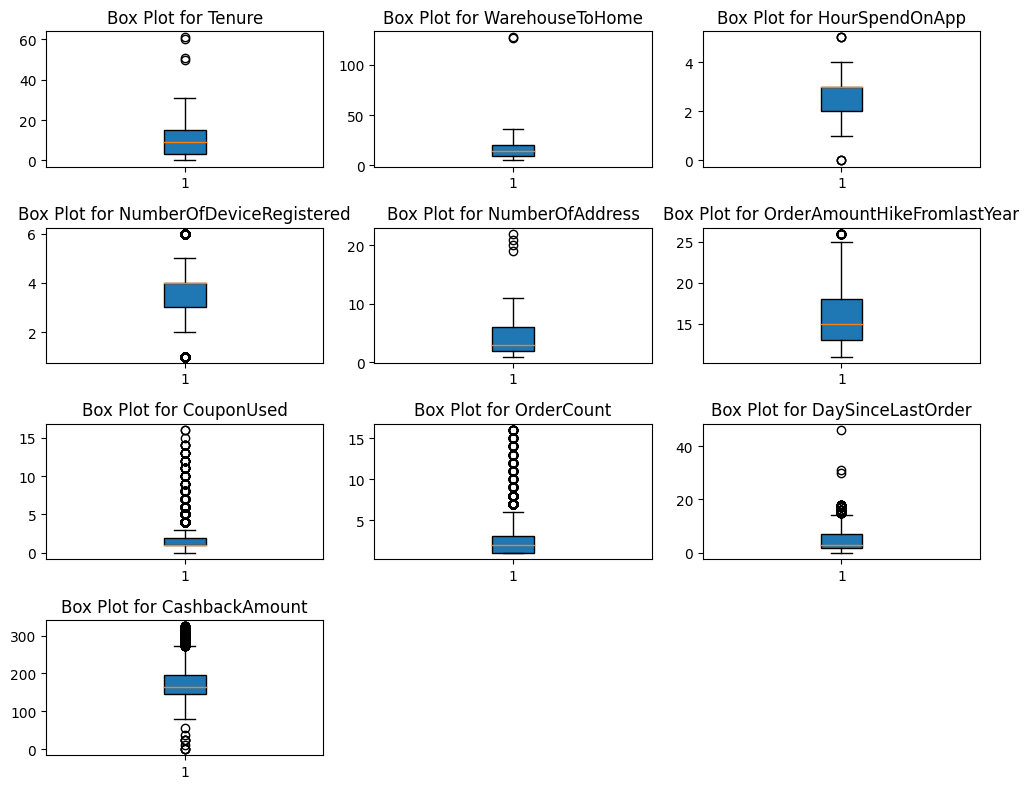

In [ ]:


# Plotting box plots for all numerical columns
plt.figure(figsize=(10, 8))

# Iterate over numerical columns and create boxplots
for i, col in enumerate(df_numerical_filtered.columns, 1):
    plt.subplot((len(df_numerical_filtered.columns) // 3) + 1, 3, i)
    plt.boxplot(df_numerical_filtered[col].dropna(), patch_artist=True)
    plt.title(f'Box Plot for {col}')
    plt.tight_layout()

plt.show()


In [ ]:
# Binning Tenure into quartiles
df_cleaned['TenureGroup'] = pd.qcut(df_cleaned['Tenure'], q=4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])
df_cleaned['TenureGroup'].value_counts()

,count
TenureGroup,
25-50%,1585
0-25%,1560
75-100%,1380
50-75%,1105


In [ ]:
# Create custom bins for 'Tenure'
bins = [0, 6, 12, 24, 60]  # Custom bin edges based on distribution
labels = ['0-6 months', '7-12 months', '13-24 months', '25+ months']

# Apply binning
df_cleaned['TenureGroup'] = pd.cut(df_cleaned['Tenure'], bins=bins, labels=labels, right=False)

# Check the distribution of the new TenureGroup
print(df_cleaned['TenureGroup'].value_counts())


TenureGroup
0-6 months      1967
7-12 months     1585
13-24 months    1574
25+ months       502
Name: count, dtype: int64


In [ ]:
# Summary for categorical columns
df_cleaned.describe(include=['object', 'category']).T


,count,unique,top,freq
PreferredLoginDevice,5630,2,Mobile,3996
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,5,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,5,Mobile,2080
MaritalStatus,5630,3,Married,2986
TenureGroup,5628,4,0-6 months,1967


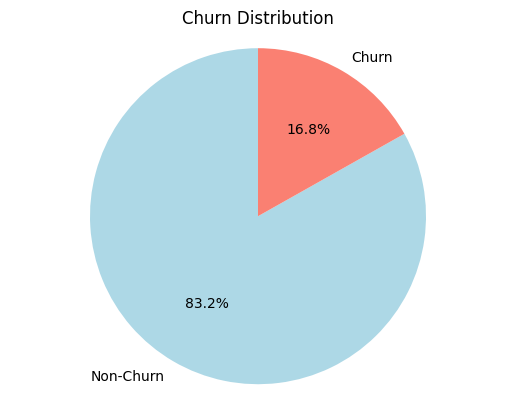

In [ ]:
# Calculate the count of churned and non-churned customers
churn_counts = df_cleaned['Churn'].value_counts()

#plt.figure(figsize=(4, 4))
plt.pie(churn_counts, labels=['Non-Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])

plt.title('Churn Distribution')
plt.axis('equal')

plt.show()

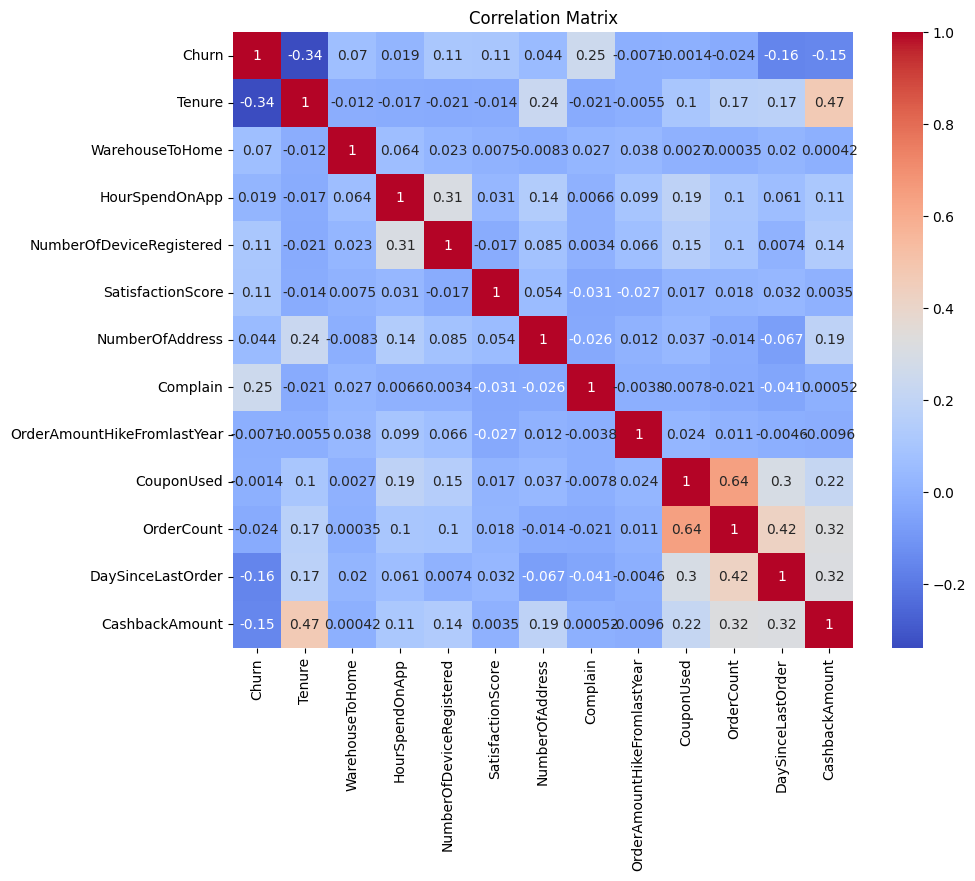

In [ ]:
# Correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
df_corr = df_cleaned.select_dtypes(include=['float64', 'int64'])
#columns_to_exclude = ['CustomerID', 'Churn','CityTier','SatisfactionScore','Complain']

# Drop those columns from df_numerical
df_corr = df_corr.drop(columns='CustomerID')

corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


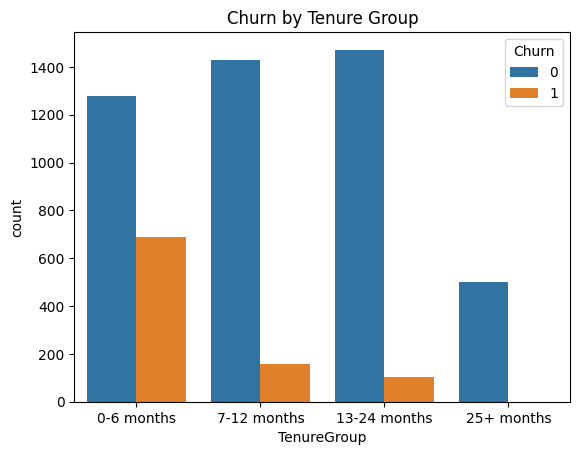

In [ ]:
# Churn rate by 'TenureGroup'

sns.countplot(x='TenureGroup', hue='Churn', data=df_cleaned)
plt.title('Churn by Tenure Group')
plt.show()



**Categorical and Ordinal columns analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

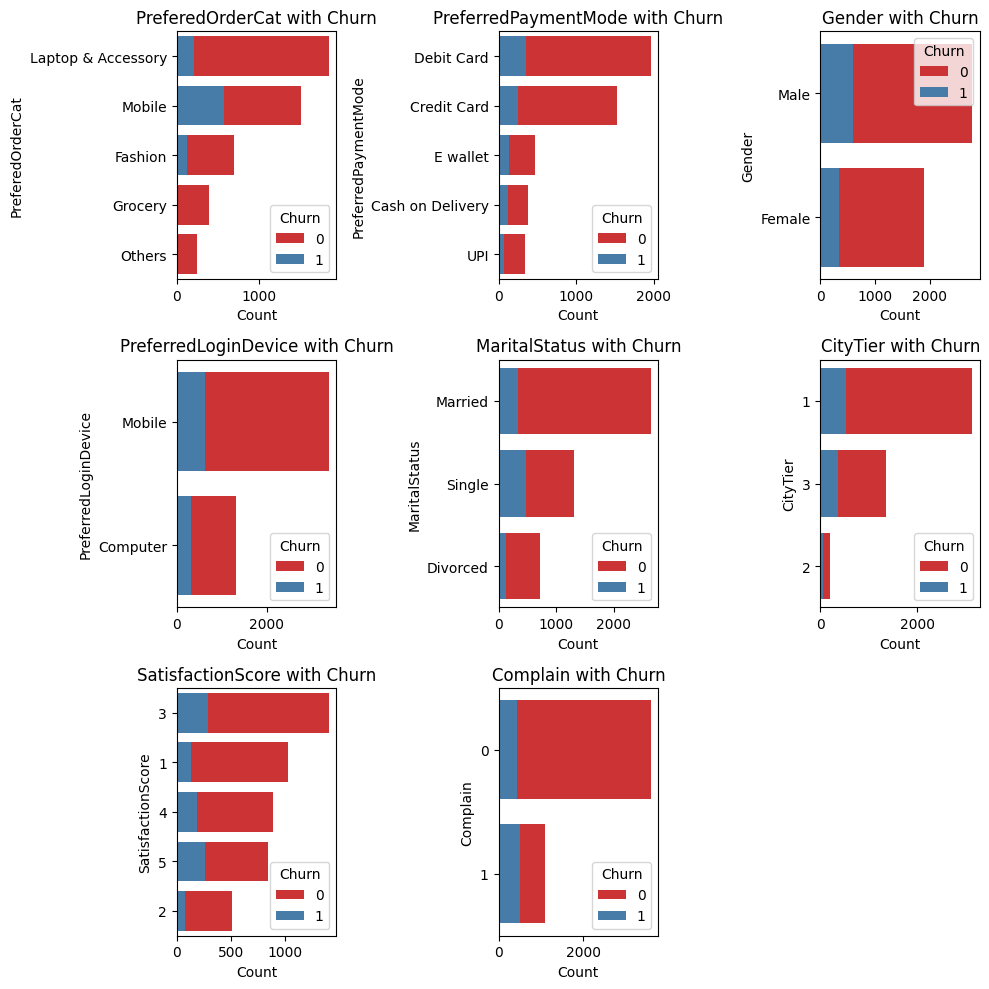

In [ ]:
# Define the categorical columns to plot
categorical_columns = ['PreferedOrderCat', 'PreferredPaymentMode', 'Gender', 'PreferredLoginDevice', 'MaritalStatus', 'CityTier', 'SatisfactionScore', 'Complain']


# Set up the subplots - 3 rows, 3 columns
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Flatten the axes array for easier indexing in the loop
axes = axes.flatten()

# Loop through each categorical column and create a countplot with hue='Churn'
for i, column in enumerate(categorical_columns):
    # Get the counts for the column, ordered by value counts
    #order = df_cleaned[column].value_counts().index
    order = df_cleaned[df_cleaned['Churn'] == 0].groupby(column)['Churn'].count().sort_values(ascending=False).index

    # Create the countplot with stacked bars (dodge=False)
    sns.countplot(y=column, hue='Churn', data=df_cleaned, order=order, ax=axes[i], palette='Set1', dodge=False)
    axes[i].set_title(f'{column} with Churn')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(column)

# Remove the last empty subplot
fig.delaxes(axes[-1])


plt.tight_layout()

# Save the plot to the specified directory
images_dir = '/content/drive/MyDrive/assignments'
plt.savefig(f"{images_dir}/categorical_freq.png",dpi=300)

plt.show();

**Numerical columns analysis**

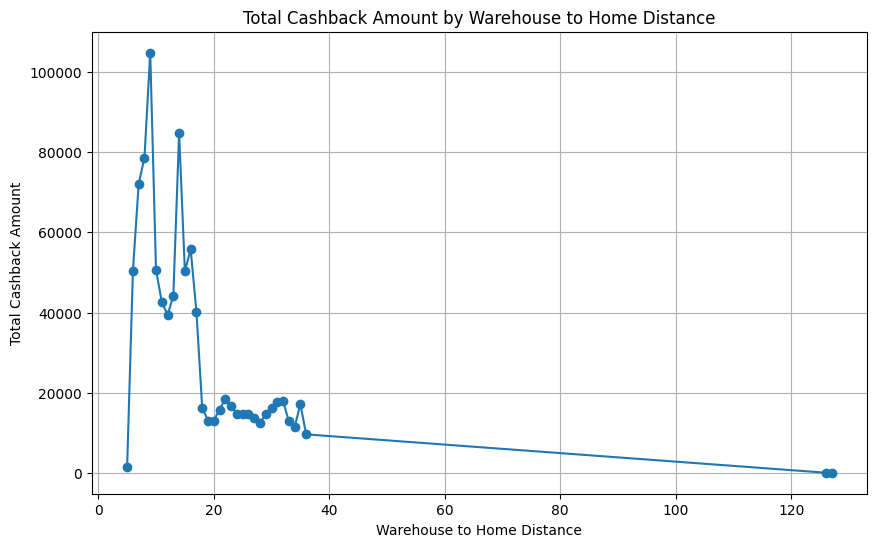

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'WarehouseToHome' and sum the 'OrderAmount' or 'CashbackAmount'
warehouse_distance_vs_total_amount = df_cleaned.groupby('WarehouseToHome')['CashbackAmount'].sum().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(warehouse_distance_vs_total_amount['WarehouseToHome'], warehouse_distance_vs_total_amount['CashbackAmount'], marker='o')

# Add title and labels
plt.title('Total Cashback Amount by Warehouse to Home Distance')
plt.xlabel('Warehouse to Home Distance')
plt.ylabel('Total Cashback Amount')

# Display the plot
plt.grid(True)
plt.show()


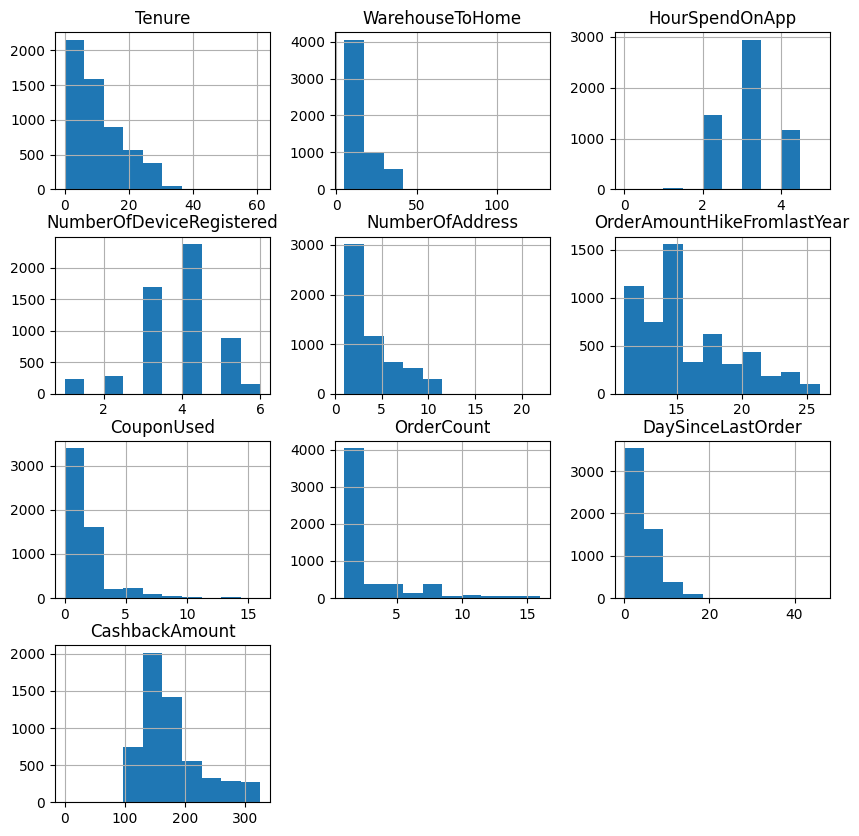

In [ ]:
df_numerical_filtered.hist(figsize=(10,10))
# Save the plot to the specified directory
images_dir = '/content/drive/MyDrive/assignments'
plt.savefig(f"{images_dir}/hist.png",dpi=300)

**Encoding**

In [ ]:
df_cleaned.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TenureGroup
0,50001,1,4.0,Mobile,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,0-6 months
1,50002,1,9.0,Mobile,1,8.0,UPI,Male,3.0,4,...,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,7-12 months
2,50003,1,9.0,Mobile,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,7-12 months
3,50004,1,0.0,Mobile,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,0-6 months
4,50005,1,0.0,Mobile,1,12.0,Credit Card,Male,3.0,3,...,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,0-6 months


In [ ]:

# Label encoding can be chosen for gender but onehot encoding removes any numerical relationship between male and female, making the encoding neutral.

#Apply One-Hot Encoding. for dummy variable trap used drop_first=true
df_encoded = pd.get_dummies(df_cleaned, columns=['PreferredLoginDevice','PreferredPaymentMode'
                                                  ,'Gender','PreferedOrderCat'
                                                 , 'MaritalStatus']
                                        , drop_first=True)

df_encoded.drop(columns=['CustomerID','TenureGroup'], inplace=True)

# Now df_encoded contains all the encoded features ready for ML

df_encoded.head()


,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,True,False,False,False,False,True,False,False,False,True
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,...,False,False,True,True,False,False,True,False,False,True
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,...,True,False,False,True,False,False,True,False,False,True
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,True,False,False,True,False,True,False,False,False,True
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,...,False,False,False,True,False,False,True,False,False,True


In [ ]:
df_encoded.count()

,0
Churn,5630
Tenure,5630
CityTier,5630
WarehouseToHome,5630
HourSpendOnApp,5630
NumberOfDeviceRegistered,5630
SatisfactionScore,5630
NumberOfAddress,5630
Complain,5630
OrderAmountHikeFromlastYear,5630


**Handling outliers with IQR method**
IQR might be the better option because it is more robust to skewed distributions and extreme outliers, which are common in business datasets.df_no_outliers.head()

In [ ]:


# Define the numerical columns you want to check for outliers
numerical_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CashbackAmount']

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
Q1 = df_encoded[numerical_columns].quantile(0.25)
Q3 = df_encoded[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on the IQR method
outliers = ((df_encoded[numerical_columns] < (Q1 - 1.5 * IQR)) |
            (df_encoded[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers from the dataset
df_no_outliers = df_encoded[~outliers]

# Check the shape of the dataset before and after removing outliers
print(f"Original dataset shape: {df_encoded.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")


Original dataset shape: (5630, 26)
Dataset shape after removing outliers: (5151, 26)


In [ ]:
df_no_outliers.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,True,False,False,False,False,True,False,False,False,True
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,...,False,False,True,True,False,False,True,False,False,True
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,...,True,False,False,True,False,False,True,False,False,True
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,True,False,False,True,False,True,False,False,False,True
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,...,False,False,False,True,False,False,True,False,False,True


In [ ]:
df_ml=df_no_outliers.copy()
df_ml.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,True,False,False,False,False,True,False,False,False,True
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,...,False,False,True,True,False,False,True,False,False,True
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,...,True,False,False,True,False,False,True,False,False,True
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,True,False,False,True,False,True,False,False,False,True
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,...,False,False,False,True,False,False,True,False,False,True


**Model Selection**
Task 2. Select two or more machine learning models appropriate for the business/social problem in question. For each algorithm, write a python code and clearly describe each step of it (related to LO2 and LO3, 25 pts.).

**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 1: Train-Test Split
X = df_ml.drop(columns=['Churn'])  # Features
y = df_ml['Churn']                 # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardization (Standard Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 3 : Handling Imbalanced Data (Using SMOTE)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the Logistic Regression model with resampled data
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_resampled, y_train_resampled)

# Step 4 : Predictions on Test Set
y_pred_smote = model_smote.predict(X_test_scaled)

# Step 5 : Evaluation (For Model with SMOTE)
print("\nEvaluation with SMOTE:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote)}")
print(classification_report(y_test, y_pred_smote))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))



Evaluation with SMOTE:
Accuracy: 0.8031037827352085
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       854
           1       0.46      0.86      0.60       177

    accuracy                           0.80      1031
   macro avg       0.71      0.83      0.73      1031
weighted avg       0.88      0.80      0.82      1031

Confusion Matrix:
[[676 178]
 [ 25 152]]


**Model Evaluation for Logistic Regression**
Task 3. Using appropriate metrics, evaluate your machine learning models and visualize their results. Compare the outcomes of different algorithms and recommend the best performing one (related to LO1 - LO3, 25 pts.).

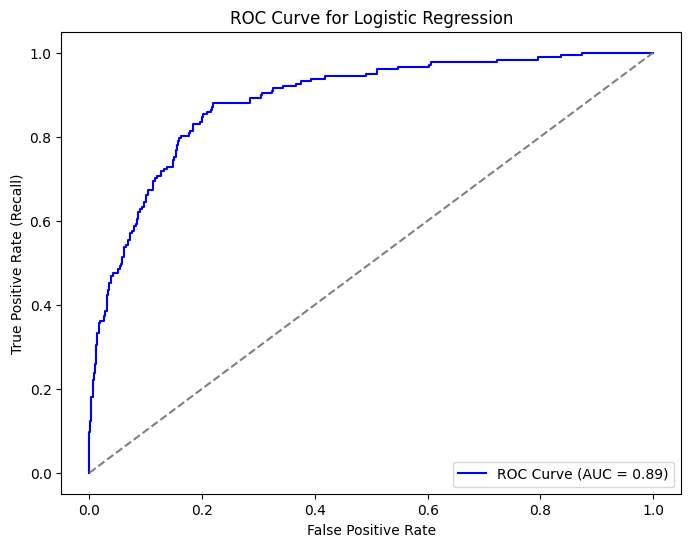

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


# Get the predicted probabilities for the test set
y_probs = model_smote.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()


The ROC Curve looks good, and the AUC (Area Under the Curve) = 0.89 is quite strong. This indicates that your model is able to distinguish between the two classes (churn and non-churn) fairly well.

The model performs quite well overall, with an AUC of 0.89 and recall of 0.86 for the churn class. However, precision for the churn class could be improved to reduce the number of false positives.

In [ ]:
# Import necessary libraries for cross-validation
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation (e.g., k=5)
cv_scores = cross_val_score(model_smote, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Calculate the mean accuracy and standard deviation
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

mean_accuracy, std_accuracy


(0.8215668051727514, 0.007096167062858543)

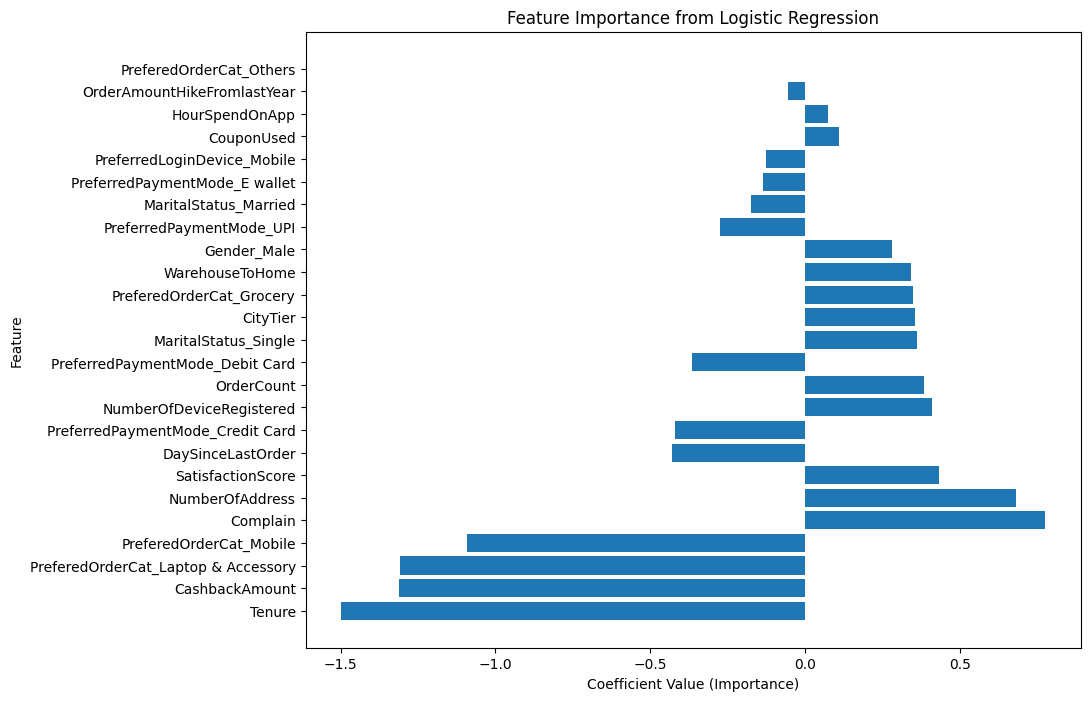

In [ ]:

# Get the feature names from your training data
feature_names = X_train.columns

# Extract the coefficients from the trained Logistic Regression model
coefficients = model_smote.coef_[0]

# Create a DataFrame to map the feature names to the coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})

# Sort the DataFrame by the absolute value of the coefficients to find the most impactful features
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title("Feature Importance from Logistic Regression")
plt.xlabel("Coefficient Value (Importance)")
plt.ylabel("Feature")
plt.show()


**Model Selection and Evaluation for Random Forest**

Why Random Forest?
Random Forest is an ensemble method that works by creating multiple decision trees and averaging their predictions. This approach typically performs better than single decision trees and is less prone to overfitting.
It also provides feature importance directly, which can be useful for further interpretation.
Additionally, Random Forest can handle imbalanced datasets by adjusting class weights or applying resampling techniques like SMOTE.

n_estimators=100,max_depth=10 helped for overfitting

Accuracy: 0.9314359637774903
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1278
           1       0.79      0.82      0.81       268

    accuracy                           0.93      1546
   macro avg       0.88      0.89      0.88      1546
weighted avg       0.93      0.93      0.93      1546

Confusion Matrix:
[[1221   57]
 [  49  219]]


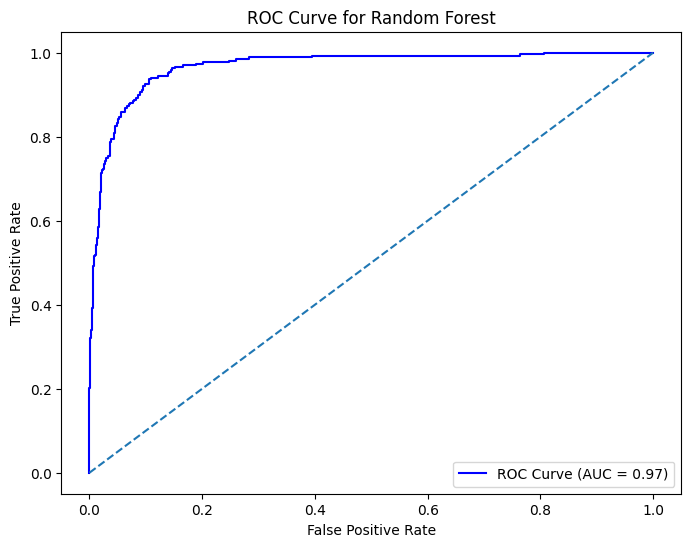

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Step 1: Train-Test Split
X = df_ml.drop(columns=['Churn'])  # Features
y = df_ml['Churn']                 # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Handle Imbalanced Data (Using SMOTE)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 4: Train Random Forest Classifier with resampled data
model_rf = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

# Step 5: Predictions on the test set
y_pred_rf = model_rf.predict(X_test_scaled)

# Step 6: Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Calculate and plot ROC-AUC curve
y_probs_rf = model_rf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class (Churn=1)
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
roc_auc = roc_auc_score(y_test, y_probs_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.show()




In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")


Cross-validation scores: [0.93203883 0.93481276 0.92926491 0.92787795 0.92649098]
Mean cross-validation accuracy: 0.9300970873786408


In [ ]:
# Predictions on the training set
y_train_pred_rf = model_rf.predict(X_train_scaled)
print("Training set accuracy:", accuracy_score(y_train, y_train_pred_rf))
print(classification_report(y_train, y_train_pred_rf))


Training set accuracy: 0.9839112343966713
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2947
           1       0.95      0.96      0.96       658

    accuracy                           0.98      3605
   macro avg       0.97      0.97      0.97      3605
weighted avg       0.98      0.98      0.98      3605



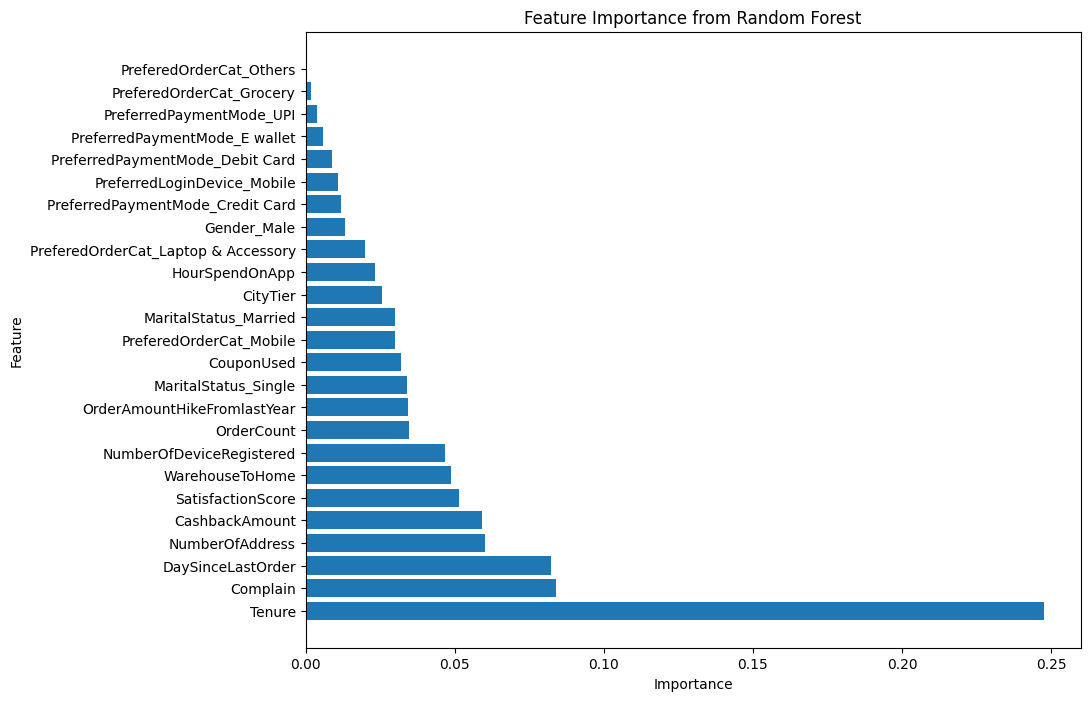

In [ ]:
# Step 7: Feature Importance from Random Forest
import pandas as pd

feature_importances = model_rf.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In Random Forest, Tenure is shown as highly important, meaning it plays a crucial role in separating churners from non-churners, but it does not indicate the direction (i.e., whether higher or lower tenure increases churn).
Both models agree that Tenure, DaySinceLastOrder, and Complain are key features, but they interpret their impacts differently.

Which Model is Better?
Random Forest outperforms Logistic Regression across almost all metrics:
Higher accuracy (96.8% vs 80.3%).
Higher precision, recall, and F1-score for the churn class.
A nearly perfect ROC AUC of 0.99 compared to Logistic Regression’s 0.89.
Conclusion:
Random Forest is the better model in this case, providing higher accuracy and better balance between precision and recall for predicting churn. It is also more capable of distinguishing between churners and non-churners, as indicated by its ROC AUC score.